In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
dataset = pd.read_parquet("color_pedia.parquet")
dataset.head()

,Color Name,HEX Code,Category,Description,Emotion,Personality,Mood,Symbolism,Use Case,Keywords,R,G,B,Hue,Saturation,Lightness,Contrast Level
0,Deep Maroon,#D62559,Red Family (Ruby Red),A vibrant and deep shade of maroon.,"Passionate, Intense","Bold, Dramatic","Strong, Powerful","Deep Maroon often symbolizes power, strength, ...",Ideal for creating a striking impact in design...,"Powerful, Passionate, Bold, Deep, Strong, Inte...",214,37,89,342.37,70.52,49.22,Dark
1,Golden Brick,#E5B262,"Warm, Earthy",A warm and inviting shade of golden brown.,"Comfort, Warmth, Optimism","Reliable, Friendly, Approachable","Cozy, Sunlit, Nurturing","Growth, Stability, Harvest",Ideal for creating a warm and inviting atmosph...,"Warm, Golden, Brown, Earthy, Comfortable, Cozy...",229,178,98,36.64,71.58,64.12,Dark
2,Lime Green,#8CCD48,"Bright, Vibrant",A lively shade of green with yellow undertones.,"Energetic, Fresh","Outgoing, Adventurous","Playful, Exciting","Growth, Renewal, Envy (in some cultures)","Ideal for modern design elements, branding for...","Bright, Vibrant, Fresh, Energy, Nature, Green,...",140,205,72,89.32,57.08,54.31,Dark
3,Sage Green #356A40,#356A40,Green,"A rich, muted green shade with a hint of blue.",Calmness and Relaxation,"Stable and reliable, like an old friend.",Serene and earthy.,"Growth, harmony, and balance in nature.",Ideal for spaces promoting relaxation and tran...,"Calm, Earthy, Nature, Reliable, Stable.",53,106,64,132.45,33.33,31.18,Dark
4,Deep Sapphire Blue,#0618DE,"Dark, Intense","A vibrant and rich shade of blue, reminiscent ...","Serene, Luxurious","Majestic, Mysterious","Calm, Elegant","Deep Sapphire Blue often symbolizes wisdom, lo...","Ideal for branding luxury items, technology, o...","Luxurious, Deep, Ocean, Premium, Elegant, Myst...",6,24,222,235.00,94.74,44.71,Dark


In [4]:
dataset.isnull().sum()

Color Name        0
HEX Code          0
Category          0
Description       1
Emotion           0
Personality       6
Mood              0
Symbolism         0
Use Case          0
Keywords          2
R                 0
G                 0
B                 0
Hue               0
Saturation        0
Lightness         0
Contrast Level    0
dtype: int64

In [5]:
dataset.shape, dataset.size

((100000, 17), 1700000)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Color Name      100000 non-null  object 
 1   HEX Code        100000 non-null  object 
 2   Category        100000 non-null  object 
 3   Description     99999 non-null   object 
 4   Emotion         100000 non-null  object 
 5   Personality     99994 non-null   object 
 6   Mood            100000 non-null  object 
 7   Symbolism       100000 non-null  object 
 8   Use Case        100000 non-null  object 
 9   Keywords        99998 non-null   object 
 10  R               100000 non-null  int64  
 11  G               100000 non-null  int64  
 12  B               100000 non-null  int64  
 13  Hue             100000 non-null  float64
 14  Saturation      100000 non-null  float64
 15  Lightness       100000 non-null  float64
 16  Contrast Level  100000 non-null  object 
dtypes: float64(

In [9]:
dataset.describe()

,R,G,B,Hue,Saturation,Lightness
count,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,127.63905,127.432440,127.673510,179.755095,66.894212,50.006995
std,73.88771,73.897411,73.852679,103.960132,23.807429,15.904531
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.780000
25%,64.00000,63.000000,64.000000,89.580000,50.000000,39.610000
50%,128.00000,127.000000,128.000000,180.000000,70.945000,50.000000
75%,192.00000,191.000000,191.000000,269.800000,86.980000,60.390000
max,255.00000,255.000000,255.000000,359.740000,100.000000,99.800000


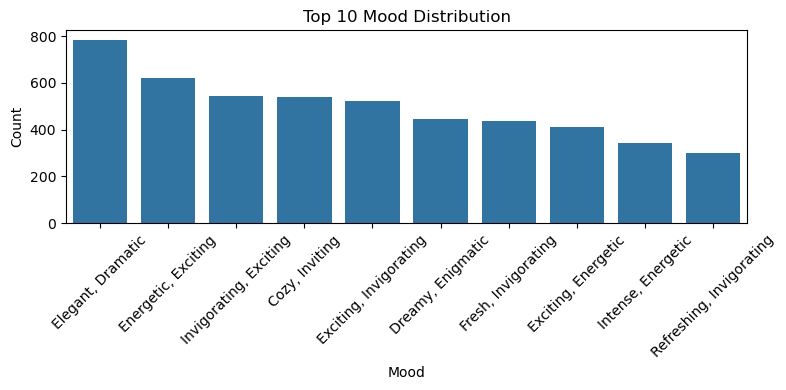

In [10]:
plt.figure(figsize=(8, 4))
sns.countplot(
    data=dataset,
    x="Mood",
    order=dataset["Mood"].value_counts().head(10).index
)
plt.title("Top 10 Mood Distribution")
plt.xlabel("Mood")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

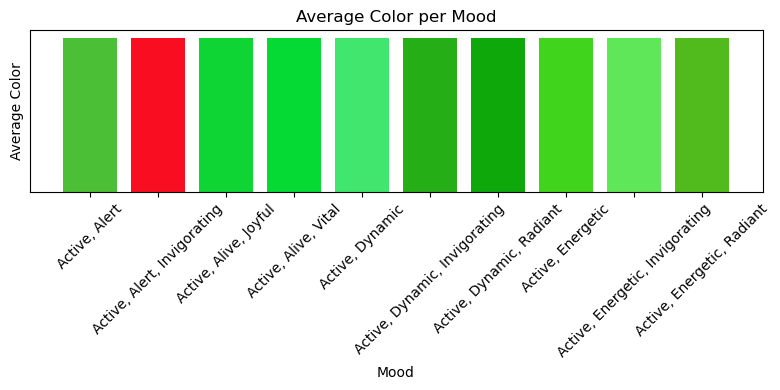

In [11]:
avg_colors = (dataset.dropna(subset=["Mood", "R", "G", "B"]).groupby("Mood")[["R", "G", "B"]].mean().head(10))

colors = avg_colors.values / 255.0
plt.figure(figsize=(8, 4))
plt.bar(avg_colors.index, [1]*len(avg_colors), color=colors)
plt.title("Average Color per Mood")
plt.xlabel("Mood")
plt.ylabel("Average Color")
plt.xticks(rotation=45)
plt.yticks([])
plt.tight_layout()
plt.show()


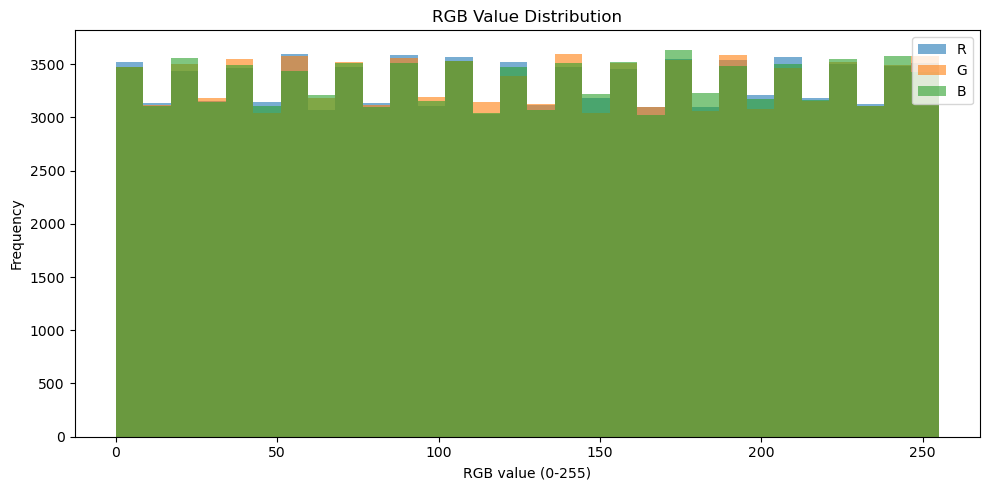

In [12]:
rgb_cols = ["R", "G", "B"]

fig, ax = plt.subplots(figsize=(10, 5))

for col in rgb_cols:
    ax.hist(dataset[col].dropna(), bins=30, alpha=0.6, label=col)

ax.set_title("RGB Value Distribution")
ax.set_xlabel("RGB value (0-255)")
ax.set_ylabel("Frequency")
ax.legend()
plt.tight_layout()

plt.savefig("viz_rgb_distribution.png", dpi=300, bbox_inches="tight")
plt.show()

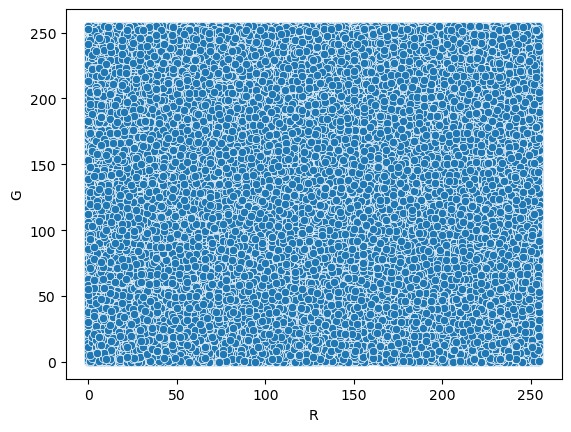

In [14]:
sns.scatterplot(data=dataset, x="R", y="G")
plt.show()

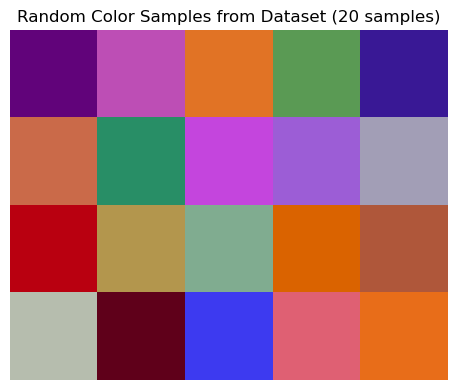

In [15]:
rgb = dataset[["R", "G", "B"]].dropna().sample(n=20, random_state=42).reset_index(drop=True)
colors = (rgb[["R", "G", "B"]].values / 255.0).reshape(4, 5, 3)

fig, ax = plt.subplots(figsize=(8, 4))
ax.imshow(colors)
ax.set_title("Random Color Samples from Dataset (20 samples)")
ax.axis("off")
plt.tight_layout()

plt.savefig("viz_palette_grid.png", dpi=300, bbox_inches="tight")
plt.show()